In [1]:
import rasterio
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt

In [18]:
wind = rasterio.open('netcdf:../data/raw/uvwind/2016.u.nc:uwnd')
# fire = rasterio.open('../data/raw/mcd64a1/2016.3.tif')
fire = rasterio.open('../data/processed/cropped_and_sampled/2016.03.00.067.tif')

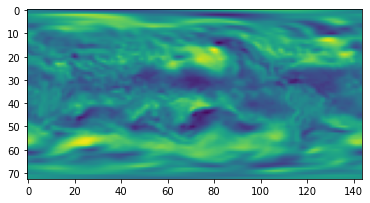

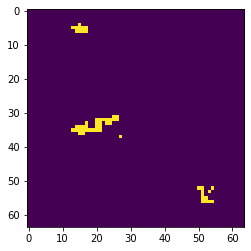

In [19]:
plt.imshow(wind.read(1))
plt.show()
plt.imshow(fire.read(1))

273.00390625
273.28515625
Window(col_off=109.70156250000001, row_off=24.1658203125, width=0.11249999999999716, height=0.11250000000000071)


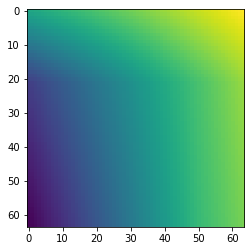

In [25]:
def c180_to_360(d):
    return (((d - 180) % 360) + 180)

print(c180_to_360(fire.bounds.left))
print(c180_to_360(fire.bounds.right))

window = rasterio.windows.from_bounds(
    top=fire.bounds.top,
    bottom=fire.bounds.bottom,
    left=c180_to_360(fire.bounds.left),
    right=c180_to_360(fire.bounds.right),
    transform=wind.transform
    )
print(window)

fb1 = fire.read(1)
band1 = wind.read(1, window=window, out_shape=fb1.shape, resampling=rasterio.enums.Resampling.bilinear)
plt.imshow(band1)